# Modelo de regresion lineal

#### 1.Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [25]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_regression

# Cargar el dataset y tomar una muestra del 10%
file_path = 'car details v4.csv'
df = pd.read_csv(file_path).sample(frac=0.9, random_state=42)

Primeras filas del dataset:
                Make                         Model    Price  Year  Kilometer  \
1298            BMW      X5 xDrive 30d Expedition  4800000  2017      35000   
591   Maruti Suzuki             Vitara Brezza VDi   825000  2018      48174   
1318  Maruti Suzuki               Baleno Zeta 1.3   695000  2016      68921   
1067          Skoda  Rapid Ambition 1.6 TDI CR MT   950000  2019      32809   
29            Honda             WR-V VX MT Petrol   819999  2018      27963   

     Fuel Type Transmission    Location   Color  Owner Seller Type   Engine  \
1298    Diesel    Automatic       Delhi   Black  First  Individual  2993 cc   
591     Diesel       Manual       Thane   White  First  Individual  1248 cc   
1318    Diesel       Manual   Hyderabad     Red  First  Individual  1248 cc   
1067    Diesel       Manual  Coimbatore  Silver  First  Individual  1598 cc   
29      Petrol       Manual       Delhi   White  First  Individual  1199 cc   

               Max Po

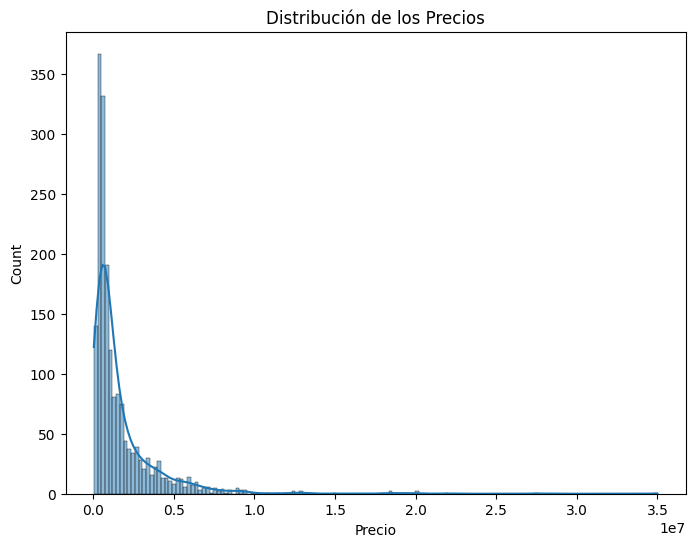

In [26]:
# Ver primeras filas del dataset
print("Primeras filas del dataset:\n", df.head())

# Información general del dataset
print("\nInformación del dataset:")
print(df.info())

# Resumen estadístico
print("\nResumen estadístico:\n", df.describe())

# Visualización de la distribución de precios
plt.figure(figsize=(8, 6))
sns.histplot(df['Price'], kde=True)
plt.title("Distribución de los Precios")
plt.xlabel("Precio")
plt.show()

##### 2.Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.


Columnas categóricas: Index(['Make', 'Model', 'Fuel Type', 'Transmission', 'Location', 'Color',
       'Owner', 'Seller Type', 'Engine', 'Max Power', 'Max Torque',
       'Drivetrain'],
      dtype='object')
Columnas numéricas: Index(['Price', 'Year', 'Kilometer', 'Length', 'Width', 'Height',
       'Seating Capacity', 'Fuel Tank Capacity'],
      dtype='object')


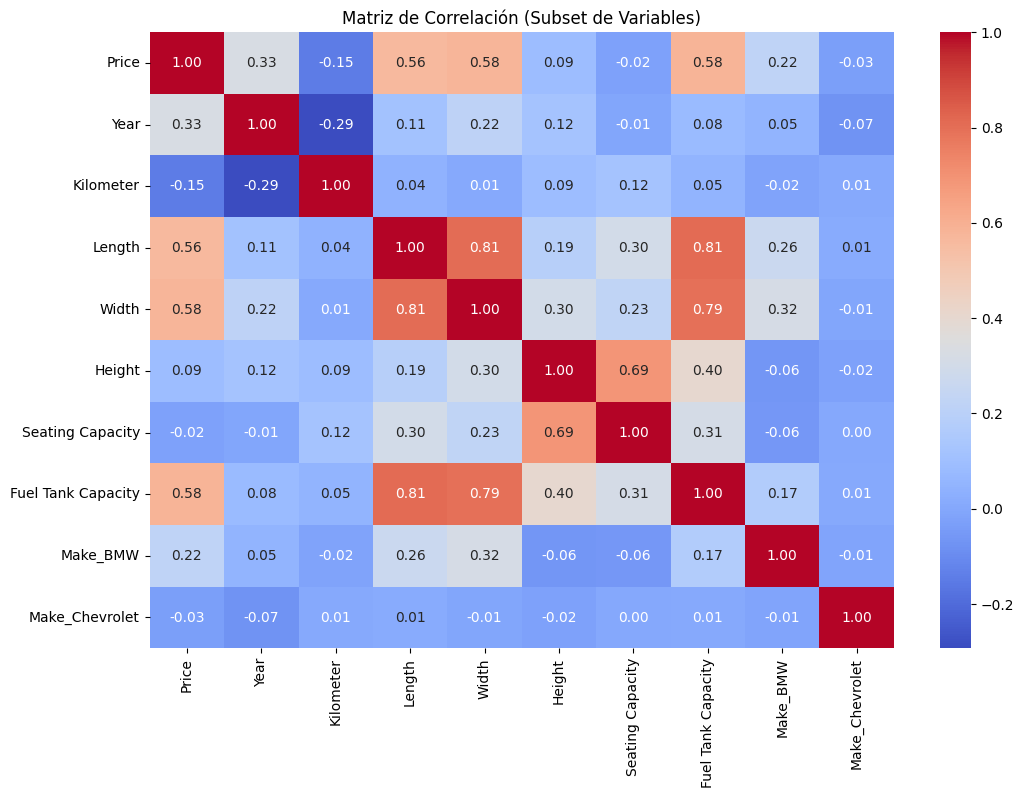


Columnas categóricas: Index([], dtype='object')
Columnas numéricas: Index(['Price', 'Year', 'Kilometer', 'Length', 'Width', 'Height',
       'Seating Capacity', 'Fuel Tank Capacity', 'Make_BMW', 'Make_Chevrolet',
       ...
       'Max Torque_95 Nm @ 4000 rpm', 'Max Torque_96 Nm @ 3000 rpm',
       'Max Torque_96 Nm @ 3500 rpm', 'Max Torque_98 Nm @ 3000 rpm',
       'Max Torque_99 Nm @ 4500 rpm', 'Max Torque_99.08 Nm @ 4500 rpm',
       'Max Torque_99.081 Nm @ 4500 rpm', 'Max Torque_99@2800',
       'Drivetrain_FWD', 'Drivetrain_RWD'],
      dtype='object', length=1838)

Valores faltantes por columna:
 Price                               0
Year                                0
Kilometer                           0
Length                             59
Width                              59
                                   ..
Max Torque_99.08 Nm @ 4500 rpm      0
Max Torque_99.081 Nm @ 4500 rpm     0
Max Torque_99@2800                  0
Drivetrain_FWD                      0
Drivetrai

In [27]:
# Identificar columnas categóricas y numéricas
cat_columns = df.select_dtypes(include=['object']).columns
num_columns = df.select_dtypes(exclude=['object']).columns
print("\nColumnas categóricas:", cat_columns)
print("Columnas numéricas:", num_columns)

# Convertir solo las columnas categóricas relevantes a variables dummy
df = pd.get_dummies(df, columns=cat_columns, drop_first=True)

# 4. Matriz de correlación simplificada para las primeras 10 columnas
plt.figure(figsize=(12, 8))
sns.heatmap(df.iloc[:, :10].corr(), annot=True, cmap="coolwarm", fmt=".2f")  # Solo las primeras 10 columnas
plt.title("Matriz de Correlación (Subset de Variables)")
plt.show()

# Identificar columnas categóricas y numéricas
cat_columns = df.select_dtypes(include=['object']).columns
num_columns = df.select_dtypes(exclude=['object']).columns

# Mostrar columnas categóricas y numéricas
print("\nColumnas categóricas:", cat_columns)
print("Columnas numéricas:", num_columns)

# Verificar si existen valores faltantes
print("\nValores faltantes por columna:\n", df.isnull().sum())

# Eliminar filas con valores nulos
df = df.dropna()

##### 3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.

In [28]:
# Selección de características y variable objetivo
X = df.drop(columns='Price')  # Excluir la variable objetivo 'Price'
y = df['Price']

# Eliminación de filas con valores nulos
X = X.dropna()
y = y[X.index]


##### 4.Dividir el dataset en Train y Test

In [29]:
# Dividir el dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##### 5.Configuración y entrenamiento del modelo

In [30]:
# Escalar características numéricas y codificar categóricas
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
    ], remainder='passthrough')

# Crear pipeline que preprocesa y ajusta el modelo de regresión lineal
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_selection', SelectKBest(score_func=f_regression, k=15)),  # Selección de las 15 mejores características
    ('regressor', LinearRegression())
])

# Entrenar el modelo
model_pipeline.fit(X_train, y_train)

c:\Users\DIRECTOR FACTURACION\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  Index(['Year', 'Kilometer', 'Length', 'Width', 'Height', 'Seating Capacity',
       'Fuel Tank Capacity'],
      dtype='object'))])),
                ('feature_selection',
                 SelectKBest(k=15,
                             score_func=<function f_regression at 0x00000277357FDF80>)),
                ('regressor', LinearRegression())])

##### 6. Evaluar el desempeño del modelo en el conjunto de Test conmétricas como precisión, recall, F1-score, etc

In [31]:
# Hacer predicciones en el conjunto de prueba
y_pred = model_pipeline.predict(X_test)

# Calcular métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Mostrar resultados
print("Métricas de desempeño del modelo:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R2 Score: {r2}")

Métricas de desempeño del modelo:
Mean Squared Error (MSE): 1780501810073.2908
Mean Absolute Error (MAE): 744142.5382898056
R2 Score: 0.5806251708467076


##### 7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.

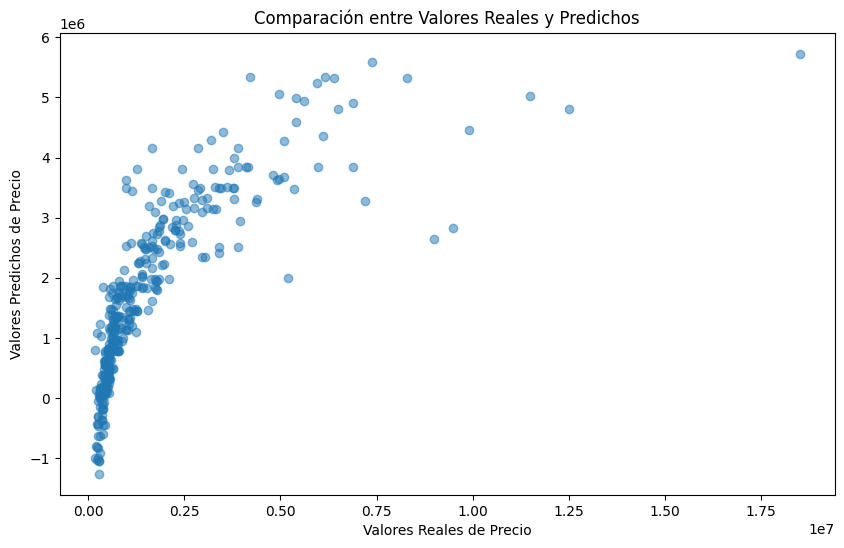

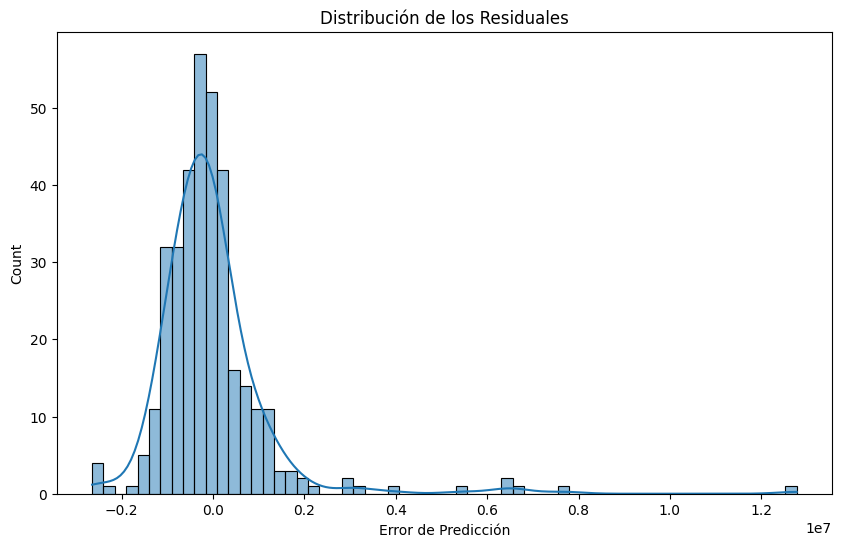

In [32]:
# Visualización de resultados
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Valores Reales de Precio")
plt.ylabel("Valores Predichos de Precio")
plt.title("Comparación entre Valores Reales y Predichos")
plt.show()

# Residuales
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title("Distribución de los Residuales")
plt.xlabel("Error de Predicción")
plt.show()